In [1]:
import re
import numpy
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from matplotlib import style
plt.style.use('seaborn-deep')
pd.options.mode.chained_assignment = None

--- 
 
 
# Data Processing and Cleaning 
 
> #### We can immediatly drop some irrelevant information that may not be relevant for data analysis 
>
> Here we are trying to find kills per distance of each weapon type
>> 
>>| Name of column | Description of why to drop | 
| :---------- | :-------------------------- | 
| ['match_id'] |      The identity of discrete match details is irrelevant to our overall data discussion | 
| ['team_id'] | Team ID only tells us if the player initiated matching with other players  | 
| ['player_name'] |    The identity of the player is irrelevant to data discussion  | 
| ['player_assists'] |    This statistic is for back-end development purposes  |
| ['player_placement'] |    This statistic is irrelevant to us as there is no use for it  |


In [39]:
erangel_kill = pd.read_csv('sample.csv')

erangel_kill.drop('match_id', axis=1, inplace=True)
erangel_kill.drop('killer_name', axis=1, inplace=True)
erangel_kill.drop('killer_placement', axis=1, inplace=True)
erangel_kill.drop('victim_name', axis=1, inplace=True)
erangel_kill.drop('victim_placement', axis=1, inplace=True)
erangel_kill = erangel_kill[erangel_kill["killed_by"].str.contains("AKM|AUG A3|AWM|Bizon|Crossbow|DP-28|G36C|Grenade|Groza|Kar98k|M16A4|M24|M249|M416|M762|MK47 Mutant|MP5K|Micro UZI|Mini 14|Mk14|Molotov|P18C|P1911|P92|QBU|QBZ95|R1895|R45|S12K|S1897|S686|SKS|SLR|Sawed-off| Scar|Skorpion|Tommy Gun|UMP45|VSS|Vector|Win94")==True]

erangel_kill

,time,killed_by,killer_position_x,killer_position_y,victim_position_x,victim_position_y
2,975,Kar98k,345587.468750,140552.984375,344036.781250,144871.671875
3,1255,G36C,420516.906250,145435.109375,421059.000000,145275.500000
4,280,G36C,243228.250000,238198.281250,243265.750000,237879.890625
5,101,UMP45,357259.781250,353541.125000,357238.750000,353305.562500
6,1585,UMP45,402494.718750,129671.914062,402918.906250,130400.109375
...,...,...,...,...,...,...
1322363,1072,M24,277868.156250,147078.375000,273294.187500,147043.203125
1322364,123,M416,94051.335938,119070.710938,94905.406250,119155.976562
1322365,860,SLR,182383.953125,141002.421875,163486.468750,161870.781250
1322367,526,QBZ95,195205.421875,197135.875000,196735.750000,197023.234375


--- 
 
 
# Data Processing and Cleaning 
 
> <b>We get distance of kill by getting the euclidean distance between the killer and victim position.</b>
>
> We then split the data by weapon type and then output it onto a graph to see results



In [4]:
x_diffs = erangel_kill['killer_position_x'] - erangel_kill['victim_position_x']
x_diffs = x_diffs/800000*4096
y_diffs = erangel_kill['killer_position_y'] - erangel_kill['victim_position_y']
y_diffs = y_diffs/800000*4096
sq_diffs = x_diffs ** 2 + y_diffs ** 2
dists = np.sqrt(sq_diffs)


In [5]:
erangel_kill['killer_position_x'] = dists

In [6]:
erangel_kill = erangel_kill.rename(columns={'killer_position_x': 'kill_distance'})

In [7]:
erangel_kill.drop('victim_position_x', axis=1, inplace=True)
erangel_kill.drop('victim_position_y', axis=1, inplace=True)
erangel_kill.drop('killer_position_y', axis=1, inplace=True)

In [8]:
erangel_kill

,time,killed_by,kill_distance
2,975,Kar98k,23.493879
3,1255,G36C,2.893325
4,280,G36C,1.641428
5,101,UMP45,1.210877
6,1585,UMP45,4.314807
...,...,...,...
1322363,1072,M24,23.419412
1322364,123,M416,4.394578
1322365,860,SLR,144.144445
1322367,526,QBZ95,7.856476


In [9]:
erangel_kill_shotgun_pistol = erangel_kill[erangel_kill["killed_by"].str.contains("P18C|P1911|P92|R1895|R45|S12K|S1897|S686|Sawed-off|Skorpion")==True]
erangel_kill_smg = erangel_kill[erangel_kill["killed_by"].str.contains("Bizon|MP5K|Micro UZI|Tommy Gun|UMP45|Vector")==True]
erangel_kill_rifle = erangel_kill[erangel_kill["killed_by"].str.contains("AUG A3|AKM|DP-28|Groza|G36C|M16A4|M249|M416|M762|MK47 Mutant|QBU|QBZ95|Scar|VSS|Win94|Mini 14")==True]
erangel_kill_sniper = erangel_kill[erangel_kill["killed_by"].str.contains("AWM|Kar98k|M24|Mk14|SKS|SLR")==True]

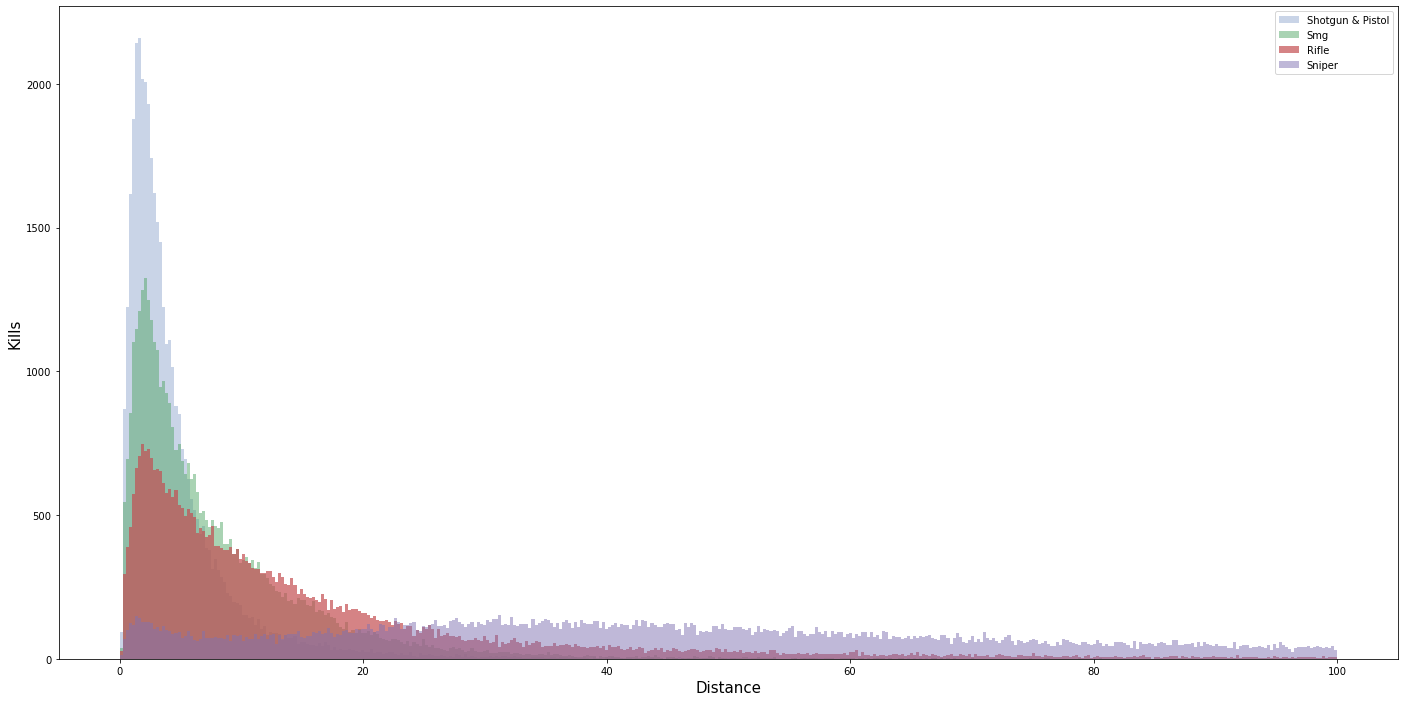

In [38]:
df1 = pd.DataFrame(erangel_kill_shotgun_pistol['kill_distance'])
df2 = pd.DataFrame(erangel_kill_smg['kill_distance'])
df3 = pd.DataFrame(erangel_kill_rifle['kill_distance'])
df4 = pd.DataFrame(erangel_kill_sniper['kill_distance'])

df1 = df1.sample(n = 40000) #sample 40000 data points
df2 = df2.sample(n = 40000) #sample 40000 data points
df3 = df3.sample(n = 40000) #sample 40000 data points
df4 = df4.sample(n = 40000) #sample 40000 data points

bins = numpy.linspace(0, 100, 400)
f = plt.figure(figsize=(24,12))

plt.xlabel("Distance",fontsize=15)
plt.ylabel("Kills",fontsize=15)

plt.hist(df1, bins, alpha=0.3, label='Shotgun & Pistol')
plt.hist(df2, bins, alpha=0.5, label='Smg')
plt.hist(df3, bins, alpha=0.7, label='Rifle')
plt.hist(df4, bins, alpha=0.5, label='Sniper')

plt.legend(loc='upper right')
plt.show()


--- 
 
 
# Conclusion 
 
<font color = 'blue'>1. <b>Sniper</b> reigns supreme when killing players from a far distance, followed by <b>Rifle</b>, <b>SMG</b>, <b>Shotgun/Pistol</b></font>

<font color = 'green'>2. In close ranges, many deaths were caused by the <b>Shotgun/Pistol</b></font>